[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nils-holmberg/socs-qmd/blob/main/jnb/lab2_nlp2.ipynb)

# Natural Language Processing on the Israel and Palestine Conflict 
by Minahil Malik

This lab report aims to analyze the topics and sentiments that arise in articles written by the Economist surrounding Israel. 

### Significance and background
The Israel-Palestine Conflict, one of the most enduring conflicts in history, dates back to the start of the 20th century, with the establishment of the British Mandate in Palestine (Imtiaz et al. 2022).  The conflict is intricately woven with complexities in political, demographic, and religious spheres (Imtiaz et al. 2022).  These deep-seated and multifaceted challenges present significant challenges to finding a resolution and contribute to its volatile nature, particularly in online discussions.
Online mass media significantly influences public opinion on controversial events, notably in the Israeli-Palestinian conflict. Palestinians often perceive a bias in Western media coverage (Al-Sarraj and Lubbad, 2018: 98). Despite journalistic norms of objectivity, reports frequently embed personal opinions, intensifying debates about media objectivity in this conflict.
This study seeks to analyze the topics and sentiments presented by a major news outlet like The Economist, often considered 'objective', in the context of the Israeli-Palestinian conflict. Understanding this is particularly important to understand the role of mass media in shaping public opinion and for comprehending the broader debate around such volatile issues. The results of this study provide a data-driven perspective on the perception of contentious conflicts, enhancing academic research in this area. Additionally, the findings offer the general public a more nuanced understanding of the conflict, contributing to the discourse on media ethics and journalistic practices.

### Method
This report employs content analysis, adhering to Neuendorf's definition of it as a “systematic, objective, and quantitative examination of message characteristics” (Neuendorf, 2017:  2). Specifically, this report concentrates on a computer-driven analysis of word usage within news media.

## Importing the Dataset

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [54]:
fp = "economist_dataset.csv"
df = pd.read_csv(fp, header=0) # header=0 means the first row is the header row
print(df.shape)
df.head()

(168, 2)


,link,content
0,https://www.economist.com/middle-east-and-afri...,WITH THE war in Gaza about to enter its third ...
1,https://www.economist.com/leaders/2023/12/07/i...,IF YOU WANT to understand how desperately Isra...
2,https://www.economist.com/middle-east-and-afri...,ON DECEMBER 1st Israel embarked on what could ...
3,https://www.economist.com/middle-east-and-afri...,WHEN HAMAS smashed across the Gaza border on O...
4,https://www.economist.com/middle-east-and-afri...,The war in Gaza has ushered in a grim new econ...


Exploratory Data Analysis 

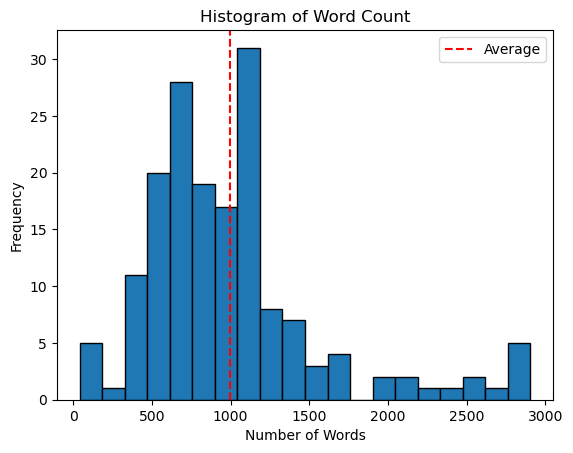

In [55]:
corpus = df['content'].tolist()
split_corpus = [article.split() for article in corpus]
# descriptive analysis
# Number of words in each article
word_count = [len(article) for article in split_corpus]
import matplotlib.pyplot as plt

plt.hist(word_count, bins=20, edgecolor='black')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Word Count')

# Calculate the average number of words
avg_word_count = sum(word_count) / len(word_count)

# Plot the average number of words as a vertical line
plt.axvline(x=avg_word_count, color='red', linestyle='--', label='Average')

plt.legend()
plt.show()


In [57]:
# Download necessary NLTK data
import nltk #text cleaning packages 
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
# define data cleaning function
stop = set(stopwords.words('english')) #stopwords to remove
exclude = set(string.punctuation) #punctuation to remove
exclude.update("’","“","”","—") #extra weird versions of punctuation
lemma = WordNetLemmatizer() #lemmatizer to remove word endings

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch if ch not in exclude else "" for ch in stop_free)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized 

# clean data stored in a new list
clean_corpus = [clean(doc).split() for doc in corpus]

In [58]:
# Create a frequency table
word_freq = [article for article in clean_corpus]
word_freq = pd.Series(np.concatenate(word_freq)).value_counts()
# Converting the Series to a DataFrame

word_freq_df = word_freq.to_frame().reset_index()
word_freq_df.columns = ['term','freq']
word_freq_df.head()

,term,freq
0,israel,2179
1,palestinian,1612
2,hamas,1078
3,israeli,1066
4,gaza,974


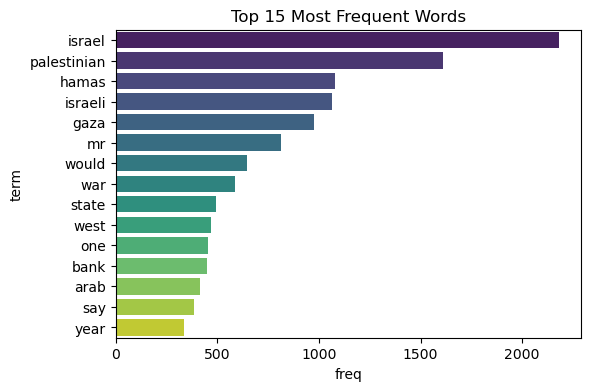

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the top N words
top_n = 15  # You can change this number to display more or fewer words
plt.figure(figsize=(6, 4))
sns.barplot(x='freq', y='term', data=word_freq_df.head(top_n), palette='viridis')

plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('freq')
plt.ylabel('term')

plt.show()

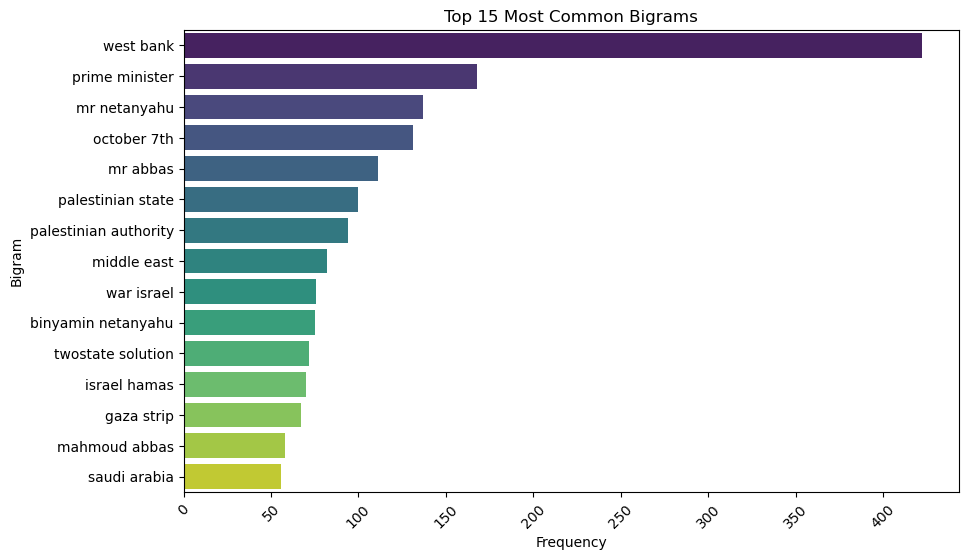

In [60]:
import nltk
from nltk import bigrams
from nltk.probability import FreqDist
#bigram frequency
combined_corpus = np.concatenate(clean_corpus)
# Create a list of all bigrams in the clean_corpus
all_bigrams = list(bigrams(combined_corpus))

# Calculate the frequency distribution of the bigrams
bigram_freq = FreqDist(all_bigrams)

# Get the most common bigrams
top_n = 15
most_common_bigrams = bigram_freq.most_common(top_n)

bigram_labels = [' '.join(bigram) for bigram, _ in most_common_bigrams]
frequencies = [freq for _, freq in most_common_bigrams]
data = pd.DataFrame({'Bigram': bigram_labels, 'Frequency': frequencies})


plt.figure(figsize=(10, 6))
sns.barplot(y='Bigram', x='Frequency', data=data, palette='viridis')
plt.title(f'Top {top_n} Most Common Bigrams')
plt.xticks(rotation=45)
plt.show()



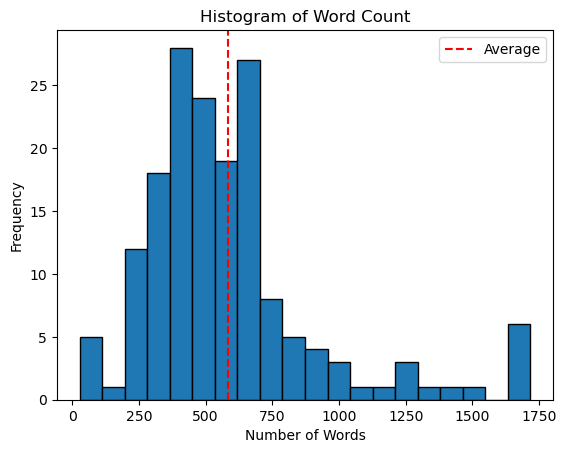

In [61]:
# descriptive analysis
# Number of words in each article
word_count = [len(article) for article in clean_corpus]
import matplotlib.pyplot as plt

plt.hist(word_count, bins=20, edgecolor='black')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Word Count')

# Calculate the average number of words
avg_word_count = sum(word_count) / len(word_count)

# Plot the average number of words as a vertical line
plt.axvline(x=avg_word_count, color='red', linestyle='--', label='Average')

plt.legend()
plt.show()


In [62]:
from collections import Counter



# Descriptive 
# Total number of documents
total_documents = len(df)
# Average words per document
avg_words = df['content'].str.split().apply(len).mean()
# Word frequency distribution
word_freq = Counter(" ".join(df['content']).split())



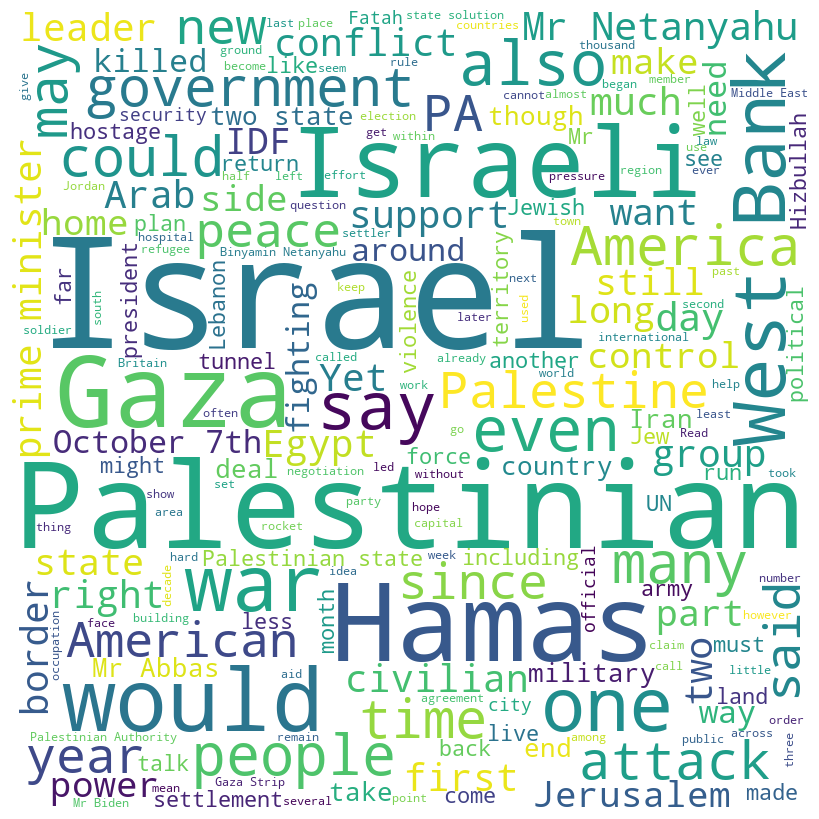

In [65]:
# Text Exploration - Word Cloud
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(df['content']))

# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# topic modeling

# topic modeling optimization (gensim)

In [68]:
import gensim
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt

# Assume 'documents' is a list of strings (your dataset)
# Preprocess your data here: tokenize, remove stopwords, etc.

# Create a dictionary and corpus
dictionary = Dictionary(clean_corpus)
corp = [dictionary.doc2bow(doc) for doc in clean_corpus]

# Function to train LDA and compute both c_v and UMass coherence scores
def compute_coherence(dictionary, corp, texts, limit, start=2):
    cv_coherence_values = []
    umass_coherence_values = []
    model_list = []
    for num_topics in range(start, limit):
        model = LdaModel(corpus=corp, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        # c_v coherence
        cv_coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        cv_coherence_values.append(cv_coherencemodel.get_coherence())
        # UMass coherence
        umass_coherencemodel = CoherenceModel(model=model, corpus=corp, dictionary=dictionary, coherence='u_mass')
        umass_coherence_values.append(umass_coherencemodel.get_coherence())

    return model_list, cv_coherence_values, umass_coherence_values


# Set parameters and compute coherence
start, limit = 2, 15
model_list, cv_coherence_values, umass_coherence_values = compute_coherence(dictionary=dictionary, corp=corp, texts=clean_corpus, start=start, limit=limit)


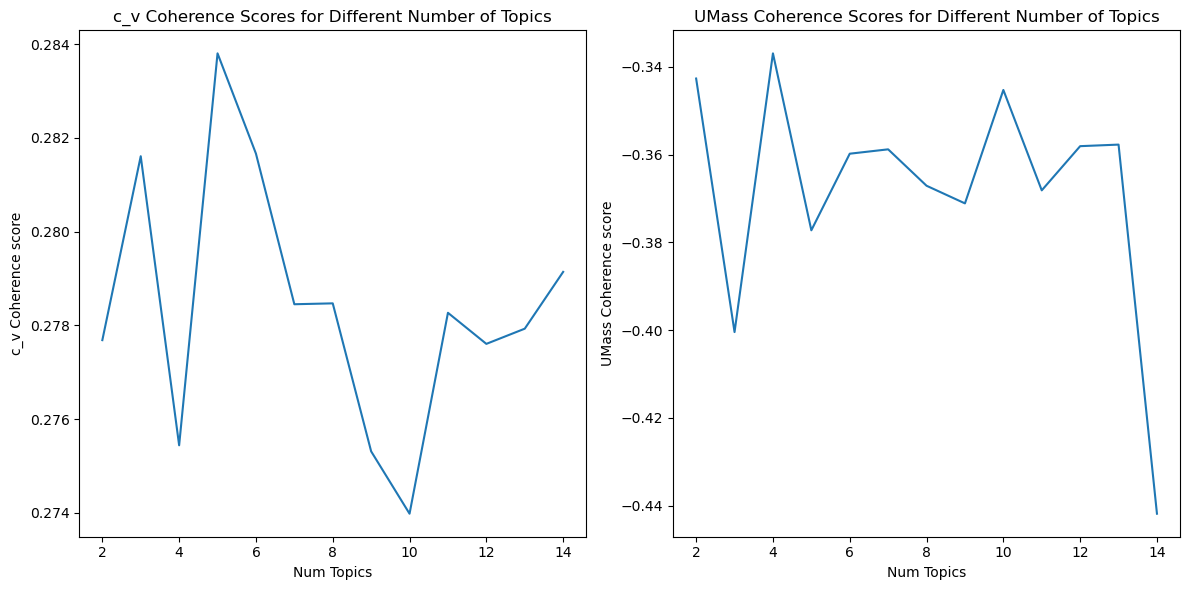

In [70]:
from matplotlib.ticker import MaxNLocator
# Plotting for c_v coherence
x = range(start, limit)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, cv_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("c_v Coherence score")
plt.title("c_v Coherence Scores for Different Number of Topics")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Plotting for UMass coherence
plt.subplot(1, 2, 2)
plt.plot(x, umass_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("UMass Coherence score")
plt.title("UMass Coherence Scores for Different Number of Topics")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

5 scores the best on c_V coherence wheras 4 scores the best according to UMass. Since c_V coherence considers the context it is typically seen as a better measure so I will go with 5 topics.

In [71]:
# modeling with optimal number of topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=corp, id2word=dictionary, num_topics=5, iterations=50, passes=10, random_state=100)


In [72]:
# Print topics
lda_model.print_topics(-1)

[(0,
  '0.012*"palestinian" + 0.011*"israel" + 0.009*"hamas" + 0.007*"pa" + 0.007*"israeli" + 0.006*"bank" + 0.006*"west" + 0.006*"gaza" + 0.005*"mr" + 0.005*"would"'),
 (1,
  '0.026*"israel" + 0.015*"hamas" + 0.014*"gaza" + 0.011*"palestinian" + 0.011*"israeli" + 0.008*"war" + 0.005*"mr" + 0.005*"would" + 0.004*"arab" + 0.004*"one"'),
 (2,
  '0.009*"tunnel" + 0.005*"israel" + 0.004*"idf" + 0.003*"hamas" + 0.003*"eu" + 0.003*"israeli" + 0.003*"gaza" + 0.002*"one" + 0.002*"europe" + 0.002*"mr"'),
 (3,
  '0.009*"palestinian" + 0.003*"jewish" + 0.003*"israel" + 0.003*"israeli" + 0.003*"christian" + 0.003*"state" + 0.003*"bank" + 0.003*"west" + 0.003*"nonviolent" + 0.003*"arab"'),
 (4,
  '0.024*"palestinian" + 0.018*"israel" + 0.013*"mr" + 0.011*"israeli" + 0.008*"would" + 0.008*"state" + 0.005*"bank" + 0.005*"west" + 0.004*"arab" + 0.004*"one"')]

# topic modeling visualization (gensim)

In [76]:
# fix dependency
!pip install --upgrade pandas
# topic modeling plotting tools
!pip install -q pyLDAvis


In [74]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(lda_model, corp, dictionary, sort_topics=False)
pyLDAvis.display(lda_display) 


In [75]:
# Save the report
pyLDAvis.save_html(lda_display, 'topic_modeling.html')

### Sentiment Analysis

In [76]:
import gensim
from gensim.models import LdaModel
from nltk.sentiment import SentimentIntensityAnalyzer

import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')





[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MarcusJW\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [77]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
document_topics = [max(lda_model.get_document_topics(bow), key=lambda item: item[1])[0] for bow in corp]
sentiments = [sia.polarity_scores(" ".join(doc))['compound'] for doc in clean_corpus]

# Aggregate sentiment by topic
topic_sentiment = {}
for topic, sentiment in zip(document_topics, sentiments):
    if topic not in topic_sentiment:
        topic_sentiment[topic] = []
    topic_sentiment[topic].append(sentiment)

average_sentiment_by_topic = {topic: sum(sentiments) / len(sentiments) for topic, sentiments in topic_sentiment.items()}

# Now `average_sentiment_by_topic` contains the average sentiment for each topic
print(average_sentiment_by_topic)

{1: -0.6476833333333334, 0: -0.3755954545454546, 4: -0.031042307692307702, 2: -0.04151666666666668, 3: 0.17325000000000002}


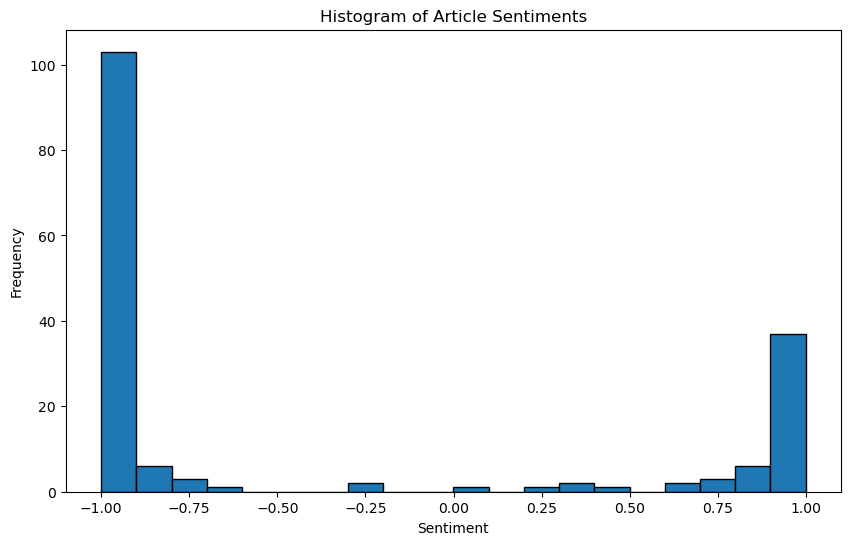

In [79]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis for each article
article_sentiments = []
for article in clean_corpus:
    sentiment = sia.polarity_scores(" ".join(article))['compound']
    article_sentiments.append(sentiment)

# Print the sentiment for each article
#for i, sentiment in enumerate(article_sentiments):
#   print(f"Article {i+1} Sentiment: {sentiment}")

# plot sentiments
plt.figure(figsize=(10, 6))
plt.hist(article_sentiments, bins=20, edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Histogram of Article Sentiments')
plt.show()

In [80]:
#Using Bert
#!pip install transformers==2.5.0
import transformers
print(transformers.__version__)

from transformers import pipeline

# Load a pre-trained BERT model for sentiment analysis
sentiment_pipeline = pipeline("sentiment-analysis")

# Assume 'documents' is your dataset
sentiments = [sentiment_pipeline(doc[:512]) for doc in corpus] # Truncate to 512 characters

# Now 'sentiments' contains the sentiment analysis results for each document


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


4.35.2


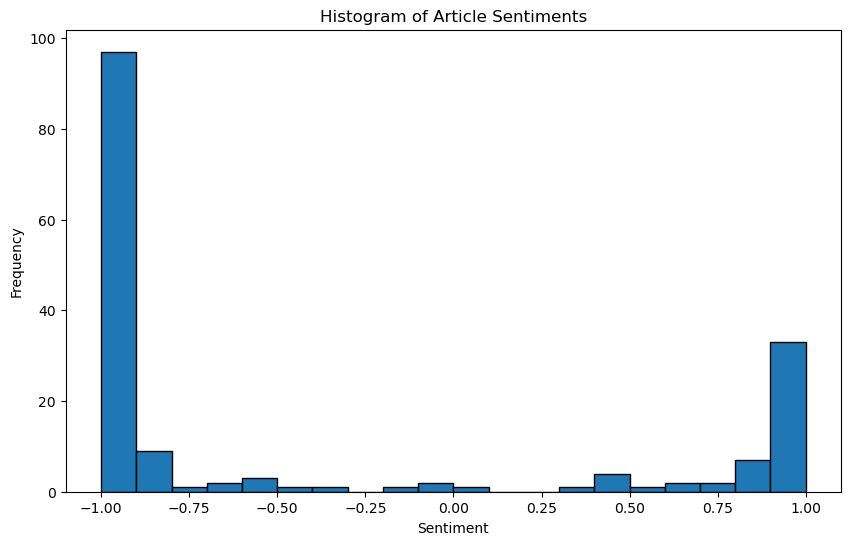

In [82]:
# Print the sentiment for each article
#for i, sentiment in enumerate(sentiments):
#    print(f"Article {i+1} Sentiment: {sentiment}")


sents = []
# convert negative sentiments to negative number
for sent in sentiments:
    if sent[0]["label"] == 'NEGATIVE':
        sents.append((-sent[0]["score"]+0.5)*2) # convert to -1-1 scale
    else:
        sents.append((sent[0]["score"]-0.5)*2) # convert to -1-1 scale
# plot sentiments
plt.figure(figsize=(10, 6))
plt.hist(sents, bins=20, edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Histogram of Article Sentiments')
plt.show()

In [95]:
from openai import OpenAI
from tqdm import tqdm
def analyze_bias(texts):
    # Prompting the user for the API key
    openai_api_key = input("Please enter your OpenAI API key: ")
    # Dictionary to store results
    
    client = OpenAI(api_key=openai_api_key)
    results = []
    for text in tqdm(texts):
        print(text)
        response = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "You will analyse the following text for potential bias. " \
            "Rate the bias on a scale of -5 to 5 with -5 being extremely biased in favor of palestine, "\
            "5 being extremely biased in favor of israel and 0 being neutral. Please respond only with a number"},
            {"role": "system", "content": f"TEXT: {text}"},
        ]
        )
        chat_response = response.choices[0].message.content
        results.append(chat_response)
    return results

texts = df['content'].tolist()
biases = analyze_bias(texts[0])



KeyboardInterrupt: 

['WITH THE war in Gaza about to enter its third month, Israeli forces are pushing hard into the crowded southern half of the coastal strip. In the most intense fighting seen so far, they are hoping to inflict as much damage as they can to Hamas’s remaining strongholds before the political clock runs out on what may be Israel’s last large-scale ground offensive of the war. Read all our coverage of the war between Israel and Hamas On December 5th Lieutenant-General Herzi Halevi, the chief of staff of the Israel Defence Forces (IDF), said his troops had encircled Khan Younis, the largest city in southern Gaza and the birthplace of Hamas’s two main leaders in Gaza, Yahya Sinwar and Muhammad Deif. They have since entered the city itself which, along with two other Hamas strongholds in northern Gaza, Shujaiya and Jabalia in Gaza city, have been the main focus of the IDF since the collapse of a weeklong truce on December 1st. Israel’s aim is to destroy Hamas’s military capability and its abil